In [9]:
# importing neccessary libraries
import pandas as pd
import numpy as np

In [10]:
# reading dataset file
df = pd.read_csv("data.csv")

In [11]:
# viewing dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
# Dropping the id column because its not useful
df.drop(columns=['id'],inplace=True)

In [13]:
# filling the nan values of bmi with the mean of the column
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [14]:
# printing unique values in each column
def uniqueValuesPrinter(data):
    for col in data.columns:
        print(f"\ncolumn {col}: {data[col].unique()}")

uniqueValuesPrinter(df)


column gender: ['Male' 'Female' 'Other']

column age: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e

In [15]:
# unknow in smoking status can be likened to nan. the value was not known, therefore i will replace every unknown value with the mode of the column

# printing number of unknown values
unknown = (df['smoking_status'] == 'Unknown').sum()
print("Number of 'unknown' values:", unknown)

Number of 'unknown' values: 1544


In [16]:
# replace the 1544 rows with the mode
mode = df.loc[df['smoking_status'] != 'Unknown', 'smoking_status'].mode()[0]
df['smoking_status'] = df['smoking_status'].replace('Unknown', mode)

# same for other in gender
mode = df.loc[df['gender'] != 'Other', 'gender'].mode()[0]
df['gender'] = df['gender'].replace('Other', mode)

uniqueValuesPrinter(df)


column gender: ['Male' 'Female']

column age: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e-01]

co

In [17]:
# not all the columns contain numerical value. so i will encode them using label encoder and also save each encoder for the original input from the user
from sklearn.preprocessing import LabelEncoder, StandardScaler
text_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

encoders = {}

for col in text_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

uniqueValuesPrinter(df)


column gender: [1 0]

column age: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e-01]

column hyperte

In [18]:
# standardizing the columns below due to the fact that their values are higher than the values of other numerical colums

num_cols = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
uniqueValuesPrinter(df)


column gender: [1 0]

column age: [ 1.05143428  0.78607007  1.62639008  0.25534165  1.58216271  1.67061744
  1.36102586  1.13988902  0.69761534  1.53793534  0.47647849  0.29956902
  0.91875218  1.40525323  0.7418427   0.6091606   1.22834376  0.38802376
  1.71484481  0.96297955  0.65338797 -0.05424993  0.21111428  1.27257113
  0.87452481  1.4494806  -0.18693204  1.49370797  1.3167985   0.56493323
  0.07843218  1.18411639  1.00720692  0.34379639 -0.01002256  1.09566165
  0.16688691  0.43225112 -0.23115941  0.52070586 -1.85341929  0.12265954
 -0.49652362 -1.29261625 -1.77911731 -1.55798046 -0.27538677 -0.14270467
 -0.36384151 -1.02725204  0.03420481 -0.8061152  -0.71766046 -0.89456993
 -1.15993415 -1.33684362 -1.73488994 -1.20416151 -0.9387973  -0.58497835
 -0.62920572 -1.42529836 -0.98302467 -1.11570678 -0.45229625 -0.85034257
 -0.40806888 -0.31961414 -1.8834939  -0.0984773  -1.87287933 -1.69066257
 -0.76188783 -0.54075099 -1.60220783 -1.38107099  0.83029744 -1.82334467
 -1.51375309 -1.

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.706375,1.001234e+00,0,1
1,0,0.786070,0,0,1,3,0,2.121559,4.615554e-16,1,1
2,1,1.626390,0,1,1,2,0,-0.005028,4.685773e-01,1,1
3,0,0.255342,0,0,1,2,1,1.437358,7.154182e-01,2,1
4,0,1.582163,1,0,1,3,0,1.501184,-6.357112e-01,1,1


In [20]:
# printing number of duplicates
duplicate = df.duplicated().sum()
print(duplicate)

0


In [21]:
# splitting data into target column and features
x = df.drop(columns=['stroke'])
y = df['stroke']
print(x.shape,y.shape)

(5110, 10) (5110,)


In [22]:
# After training my model, i realized that the 1 (that is if stroke is yes) in the data set was like 5% out of 100, so i added this code to
# add new synthetic data for 1
from imblearn.over_sampling import SMOTE

x_new, y_new = SMOTE().fit_resample(x, y)

In [23]:
# spliting the data set into training and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42,stratify=y_new)

In [24]:
# confirming split sizes
print(f"x training set:{x_train.shape}")
print(f"x test set:{x_test.shape}")
print(f"y training set:{y_train.shape}")
print(f"y test set:{y_test.shape}")

x training set:(7777, 10)
x test set:(1945, 10)
y training set:(7777,)
y test set:(1945,)


In [25]:
# training the model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:02:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [26]:
# evaluating the model
print("\n XGBoost")
print("Accuracy:", accuracy_score(y_test, prediction))
print("Classification Report:\n", classification_report(y_test, prediction))


 XGBoost
Accuracy: 0.9311053984575836
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       973
           1       0.92      0.95      0.93       972

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



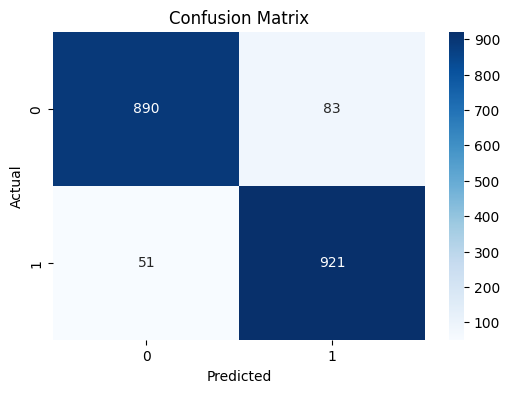

In [27]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_test, prediction)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# saving the model and also the scaler to scale input from the end user and also the encoders
import joblib

for col, le in encoders.items():
    joblib.dump(le, f'{col}_encoder.pkl')

joblib.dump(scaler, 'scaler.pkl')

joblib.dump(model,"xgboost_model.pkl")

['xgboost_model.pkl']